In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats.api as sms
import pylab as py
import scipy.linalg as la
import statistics
import scipy.stats as stats
import scipy

from math import gamma as tma
import itertools
from scipy.stats import laplace
from scipy.stats import logistic
from scipy.stats import cauchy
from scipy.stats import binom
from scipy.stats import weibull_min as weibull
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import multivariate_normal as mnorm
from scipy.stats import t as studt
from scipy.stats import f as fdist
from scipy.stats import chisquare as chisq
from scipy.stats import chi2
from scipy.stats import gaussian_kde as gkde
from sklearn.neighbors import KernelDensity
import math
import sympy as sym

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

import warnings
warnings.filterwarnings('ignore')

#### Exercise 6.4.1. 

A survey is taken of the citizens in a city as to whether or not they support the zoning plan that the city council is considering. The responses are: Yes, No, Indifferent, and Otherwise. Let $p_1,p_2,p_3,$ and $p_4$ denote the respective true probabilities of these responses. The results of the survey are:

|Yes|No|Indifferent|Otherwise|
|:-:|:-:|:-:|:-:|
|60|45|70|25|

(a) Obtain the mles of $p_i, i = 1,...,4$.

(b) Obtain $95\%$ confidence intervals, $(4.2.7),$ for $p_i , i = 1, ... , 4$.

This is just a direct application of equation $(6.4.22)$ relating to the example $6.4.5$ where the MLE is just the sample average.

In [2]:
n = 60+45+70+25
p1 = 60/n
p2 = 45/n
p3 = 70/n
p4 = 25/n

pmle = [p1,p2,p3,p4] 
print(p1,p2,p3,p4)

0.3 0.225 0.35 0.125


(a) MLEs are as listed below

|$\hat{p}_1$ (Yes)|$\hat{p}_2$ (No)|$\hat{p}_3$ (Indifferent)|$\hat{p}_4$ (Otherwise)|
|:-:|:-:|:-:|:-:|
|0.3|0.225|0.35|0.125|

In [3]:
# Confidence intervals

for i in range(len(pmle)):
    pk = pmle[i]
    sk = np.sqrt(pk*(1-pk)/n)
    print(pk-1.96*sk,pk+1.96*sk)

0.23648874115560298 0.363511258844397
0.16712604212601317 0.28287395787398684
0.28389538594016295 0.416104614059837
0.07916469701201923 0.17083530298798077


(b) Confidence intervals are as listed below

|$\hat{p}_1$ (Yes)|$\hat{p}_2$ (No)|$\hat{p}_3$ (Indifferent)|$\hat{p}_4$ (Otherwise)|
|:-:|:-:|:-:|:-:|
|(0.2365,0.3635)|(0.1671,0.2828)|(0.2839,0.4161)|(0.0791,0.1708)|

Tomoki Okuno has solutions for exercises from 6.4.2 till 6.4.6.

#### Exercise 6.4.7

The data file normal50.rda contains a random sample of size $n = 50$ for the situation described in Exercise $6.4.6.$ Download this data in R and obtain a histogram of the observations.

(a) In part (b) of Exercise $6.4.6$, let $c=58$ and let $\xi=P(X\leq c).$ Based on the data, compute the estimated value of the mle for $\xi$. Compare this estimate with the sample proportion, $\hat{p}$, of the data less than or equal to 58.

(b) The R function bootstrapcis64.R computes a bootstrap confidence interval for the mle. Use this function to compute a $95\%$ confidence interval for $\xi$. Compare your interval with that of expression $(4.2.7)$ based on $\hat{p}$.

In [4]:
data = pd.read_csv('data/normal50.csv')
data = data[['x']].copy()
data.rename(columns={'x': 'X'}, inplace=True)

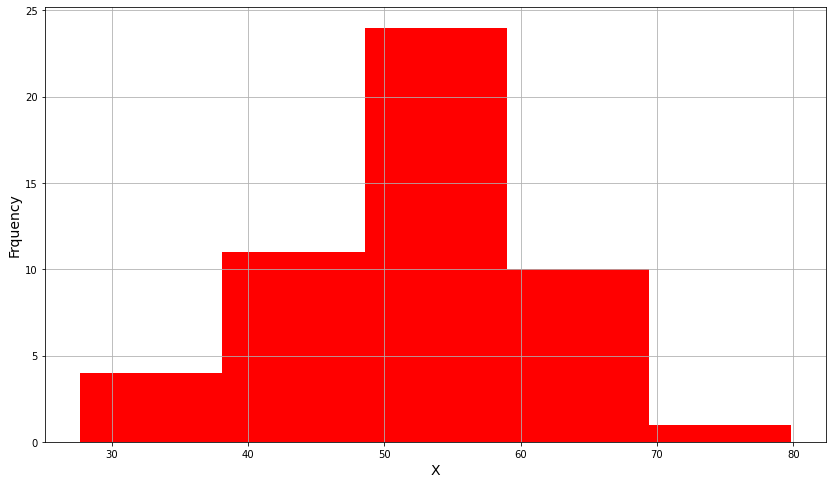

In [5]:
plt.figure(figsize=(14,8))

plt.hist(data['X'],bins=5,color='r',density=False)
plt.xlabel('X',fontsize=14)
plt.ylabel('Frquency',fontsize=14)
plt.grid()
plt.show()

In [6]:
def bootstrap_cis64(x, c, nb=3000, alp2=0.025):
    # Bootstrap CI for P(X <= c) based on mle for a normal
    # distribution. Sample is in x.
    # Converted R to Python using the online code converter at https://www.codeconvert.ai/r-to-python-converter
    
    n = len(x)
    xb = np.mean(x)
    sb = np.sqrt(((n - 1) / n) * np.var(x, ddof=1))
    est = norm.cdf((c - xb) / sb)

    collest = []
    for i in range(nb):
        xr = np.random.choice(x, size=50, replace=True)
        xb = np.mean(xr)
        sb = np.sqrt(((n - 1) / n) * np.var(xr, ddof=1))
        estr = norm.cdf((c - xb) / sb)
        collest.append(estr)

    colls = np.sort(collest)
    cut = round(nb * alp2)
    lb = colls[cut]
    ub = colls[nb - cut]
    
    return [est, lb, ub]

In [7]:
# (a)

c = 58
nx = len(data)
xb = np.mean(data['X'])
sb = np.sqrt(np.sum((data['X']-xb)*(data['X']-xb))/(nx))
xh = norm.cdf((c-xb)/sb)
ph = len(data.loc[data['X'] < c])/nx
ph,xh

(0.76, 0.7263200299258483)

In [8]:
# b

[xh_bootstrap,ll,lu] = bootstrap_cis64(data['X'],c)

print((ll,lu))

sigph = np.sqrt(ph*(1-ph)/nx)
print((ph-1.96*sigph,ph+1.96*sigph))

(0.6223278304778602, 0.8249136621075155)
(0.6416185960549546, 0.8783814039450454)


Following is from the answers at the end of the book:

$6.4.7$ (a) mle is $0.7263$, $p = 0.76$. 

A run of BS: $(0.629, 0.828).$ 

Via $\hat{p}$ : $(0.642, 0.878).$

#### Exercise 6.4.8. 

Consider Part (a) of Exercise $6.4.6.$

(a) Using the data of Exercise $6.4.7,$ compute the mle of $b$. Also obtain the estimate based on $\textrm{90}^{\textrm{th}}$ percentile of the data.

(b) Edit the R function bootstrapcis64.R to compute a bootstrap confidence interval for $b$. Then run your R function on the data of Exercise $6.4.7$ to compute a $95\%$ confidence interval for $b$.

Following is from the answers section at the end of the book:

$6.4.8$ (a) mle is $64.83$, $x_{(45)} = 64.6$

In [9]:
def dx(a,t):
    return (norm.cdf(a, loc=0, scale=1)-t)
def invert_norm(t):
    a = 10.0
    b = -10.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dx(c,t)) > tol):
        c = (a+b)/2
        if(dx(c,t) > 0):
            a = c
        else:
            b = c
    return c

In [10]:
# (a)
y = invert_norm(0.9)
bh = xb+y*sb
data['Y'] = np.sort(data['X'])
print((bh,np.percentile(data['X'],90,interpolation='lower'),data['Y'].iloc[44]))

(64.82891835793365, 64.6, 64.6)


In [11]:
# b

def bootstrapci_percentile(x, t=0.9, nb=3000, alp2=0.025):
    # Bootstrap CI for b where b is s.t P(X <= b) = t (=0.9) based on mle for a normal
    # distribution. Sample is in x.
    # Converted R to Python using the online code converter at https://www.codeconvert.ai/r-to-python-converter
    
    n = len(x)
    collest = []
    est = np.percentile(x,100*t,interpolation='lower')
    
    for i in range(nb):
        xr = np.random.choice(x, size=50, replace=True)
        estr = np.percentile(xr,100*t,interpolation='lower')
        collest.append(estr)

    colls = np.sort(collest)
    cut = round(nb * alp2)
    lb = colls[cut]
    ub = colls[nb - cut]
    
    return [est, lb, ub]

In [12]:
[est_percentile,percl,perch] = bootstrapci_percentile(data['X'])
print((percl,perch))

(59.4, 68.2)


#### Exercise 6.4.9

Consider two Bernoulli distributions with unknown parameters $p_1$ and $p_2$. If $Y$ and $Z$ equal the numbers of successes in two independent random samples, each of size $n$, from the respective distributions, determine the mles of $p_1$ and $p_2$ if we know that $0 \leq p_1 \leq p_2 \leq 1.$

The following post on SE has the solution.

https://math.stackexchange.com/a/4192451/145325

Answer is 

$$(\hat p_1, \hat p_2) = \begin{cases} \left(\frac{y}{n}, \frac{z}{n}\right), & y \le z \\ \left(\frac{y+z}{2n}, \frac{y+z}{2n}\right), & y > z. \end{cases}$$

The constraint of $p_1 \leq p_2$ brings about a slight twist in an otherwise routine solution.

Tomoki Okuno has solution for 6.4.10

6.4.11 is trivial. Solution of 6.4.12 is also trivial and solutions manual has comments under 6.4.10. But mainly, the issue is with arguing independence. My hunch is that MLEs are asymptotically normal with the covariance matrix being inverse of Fischer matrix. If $I(\bf{\theta})$ is diagonal, the covariances of this (asymptotically) normally distributed random vector are zero. Since covariance being zero implies independence in case of normal random variables, the MLEs are asymptotically independent.

#### Exercise 6.4.13

Suppose $X_1,X_2,...,X_n$ are iid $N(\mu,\sigma^2).$ Show that $X_i$ follows a location and scale family as given in Example $6.4.4.$ Obtain the entries of the information matrix as given in this example and show that they agree with the information matrix determined in Example $6.4.3.$

If we take $X_i = \mu + \sigma e_i$, where $e_i \sim \textrm{N(0,1)}$ and are iid, then $X_i \sim \textrm{N}(\mu,\sigma^2)$. So $\{X_i\}$ belong to location and scale family.

Now $F(z) \sim \textrm{N}(0,1)$ which is symmetric about $0$. So Fischer matrix is a diagonal matrix. 

Now $f'(z)/f(z) = -z$ when $F(z) \sim \textrm{N}(0,1)$. Using equations $6.4.15$ and $6.4.16$, we can show diagonal entries to be $I_{11} = \mathbb{E}(z^2)/\sigma^2 = 1/\sigma^2$ and $I_{22} = \mathbb{E}((1-z^2)^2)/\sigma^2 = (1+3-2)/\sigma^2 = 2/\sigma^2$. With $I_{12}=I_{21}=0$, this matches exactly with equation $6.4.13$